In [4]:
"""
Lists 
"""

# Exercise a)
def common_values(first, second):
    size_1 = len(first)
    size_2 = len(second)

    if size_1 >= size_2:
        larger_list = first
        smaller_list = second
    else:
        larger_list = second 
        smaller_list = first

    common_values = []
    for entry in larger_list:
        if entry in smaller_list:
            common_values.append(entry)
    return common_values 

foo = [1,2,4]
bar = [4,5,6,]
print(common_values(foo, bar))

# Exercise b)

def element_sum(first, second):
    
    output = [] 
    max_common_index = min(len(first), len(second))
    for index in range(max_common_index):
        output.append(first[index] + second[index])
    
    if len(first) == max_common_index:
        output += second[max_common_index:]
    else:
        output += first[max_common_index:]

    return output

foo = [1,2,4,10,10]
bar = [4,5,6,9]
print(element_sum(foo, bar))

# Exercise c) 
# two different approaches
def reverse_list_a(target):
    return target[::-1]

def reverse_list_b(target):
    output = [] 
    for entry in target:
        output.insert(0, entry)
    return entry 

foo = [1,2,3,4]
print(reverse_list_a(foo))
print(reverse_list_b(foo))

[4]
[5, 7, 10, 19, 10]
[4, 3, 2, 1]
4


In [15]:
"""
FizzBuzz 
"""

def FizzBuzz(N):
    for i in range(1, N+1):
        out = ''
        if i % 3 == 0:
            out += 'Fizz'
        if i % 5 == 0:
            out += 'Buzz'
        if len(out) == 0:
            out += str(i)
        print(out)

FizzBuzz(20)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz


In [140]:
"""
Complex numbers 
"""
import math 

class Complex:
    def __init__(self, real, imaginary):
        self.real = real 
        self.imaginary = imaginary 
    
    def __add__(self, other):
        """
        Sum the two values and return it as a new "Value" object
        """
        return Complex(self.real + other.real, self.imaginary + other.imaginary)

    def __mul__(self, other):
        """
        Multiply the two values and return it as a new "Value" object
        """
        real_part = self.real*other.real - self.imaginary*other.imaginary
        imag_part = self.real*other.imaginary + self.imaginary*other.real 

        return Complex(real_part, imag_part)
    
    def __sub__(self, other): 
        """
        Subtract the two values and return it as a new "Value" object
        """
        return Complex(self.real - other.real, self.imaginary - other.imaginary)

    def __abs__(self):
        """
        Compute the absolute of the number
        """
        return  math.sqrt(self.real**2 + self.imaginary**2)

    def __str__(self):
        return "{} + {}i".format(self.real, self.imaginary)

A = Complex(1,1)
B = Complex(3,2)

print(A+B)
print(A*B)
print(A-B)
print(abs(A), abs(B))

4 + 3i
1 + 5i
-2 + -1i
1.4142135623730951 3.605551275463989


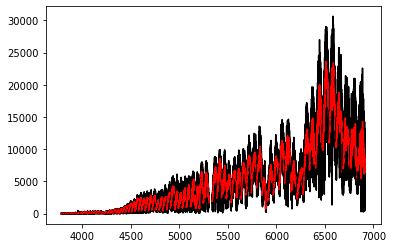

In [137]:
"""
Median filter
"""

from statistics import median 

import matplotlib.pyplot as plt 
from astropy.io import fits 

def load_data():
    with fits.open('../data/spectra.fits') as hdulist:
        wavelengths = hdulist[1].data
        spectra = hdulist[2].data 

    return wavelengths, spectra.tolist()

def boundary_condition(y_data, index, which, filter_size):
    """
    Applies the selected boundary condition to the y_data 

    Parameters
    ============
    y_data : list 
        The input data 
    index : int
        Index of the leftmost edge of the filter
    which : str 
        Which boundary condition to apply. Options : ['mirror']
    filter_size : int
        Number of points in the median window

    Returns 
    ===========
    new_values : list
        Values that expand the input data to be able to apply the filter 
    """
    if which == 'mirror':
        if index < 0:
            return y_data[1 : abs(index)+1]
        elif index > len(y_data) - filter_size: 
            return y_data[-(index + filter_size - len(y_data)+1) : -1 ]

def median_filter(y_data, filter_size):
    """
    Calculation of the median filter using a sliding window centered in each point. The filter size must be odd, in order to guarantee that there is 
    the same number of points being sampled in each side.


    Parameters
    ============
    y_data : list 
        The input data 
    filter_size : int 
        Number of points in the median window

    Returns 
    ===========
    filtered_values : list
        Computed median filter 
    """

    if filter_size % 2 == 0:
        raise ValueError("Filter size should be odd")
    output = []
    data_size = len(y_data)

    initial_leftmost_edge = -int(filter_size/2)
    
    # start_index is the position of the leftmost edge of the filter
    for start_index in range(initial_leftmost_edge, data_size + initial_leftmost_edge):
        
        if start_index < 0:
            # the leftmost edge is outside the y_data array
            value = median(y_data[0:  filter_size - abs(start_index)] + boundary_condition(y_data, start_index, 'mirror', filter_size=filter_size))
        elif start_index > data_size - filter_size:
            # the rightmost edge is outside the y_data array
            value = median(y_data[start_index:] + boundary_condition(y_data, start_index, 'mirror', filter_size=filter_size))
        else:
            value = median(y_data[start_index : start_index+filter_size])
        output.append(value)

    return output

def process_data():
    wavelengths, spectra = load_data() 
    for index, order in enumerate(spectra):
        continuum_level = median_filter(order, filter_size = 101)
        plt.plot(wavelengths[index], spectra[index], color = 'black')
        plt.plot(wavelengths[index], continuum_level, color = 'red')
    plt.show()
process_data()


